In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
df=pd.read_csv("C:/Users/rajpu/OneDrive/Desktop/b/lab9_1_dataset.csv")

df.set_index('Number' , inplace=True)
df

,City,Gender,Age,Income,Illness
Number,,,,,
1,Dallas,Male,41,40367.0,No
2,Dallas,Male,54,45084.0,No
3,Dallas,Male,42,52483.0,No
4,Dallas,Male,40,40941.0,No
5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...
149996,Austin,Male,48,93669.0,No
149997,Austin,Male,25,96748.0,No
149998,Austin,Male,26,111885.0,No


findfont: Font family ['Humor Sans'] not found. Falling back to DejaVu Sans.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   city     150000 non-null  object 
 1   gender   150000 non-null  object 
 2   age      150000 non-null  int64  
 3   income   150000 non-null  float64
 4   illness  150000 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.9+ MB
None


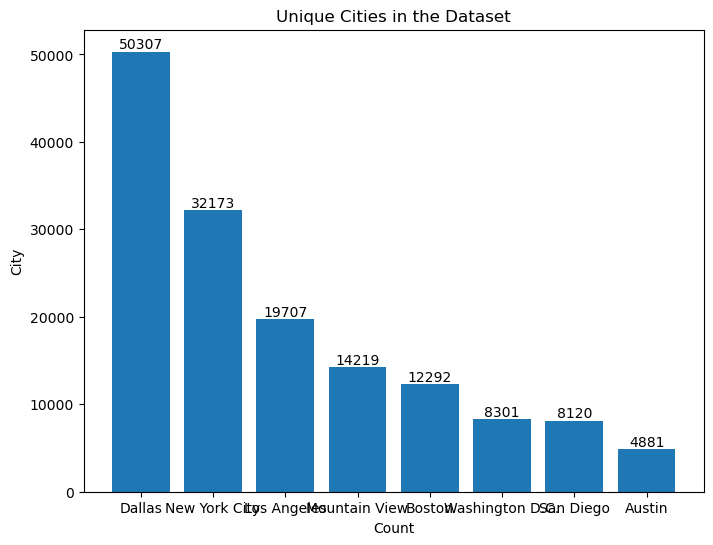

New York City      50307
Los Angeles        32173
Dallas             19707
Mountain View      14219
Austin             12292
Boston              8301
Washington D.C.     8120
San Diego           4881
Name: city, dtype: int64


In [2]:
df.columns = df.columns.str.lower()

matplotlib.font_manager.findfont('Humor Sans')
print(df.info())

unique_cities = df['city'].unique()
plt.figure(figsize=(8, 6))
plt.bar( unique_cities,df['city'].value_counts() )

for i, v in enumerate(df['city'].value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.ylabel('City')
plt.xlabel('Count')
plt.title('Unique Cities in the Dataset')
plt.show()
count=df['city'].value_counts()
print(count)

Average Age: 44.9502
Average Income: 91252.79827333333


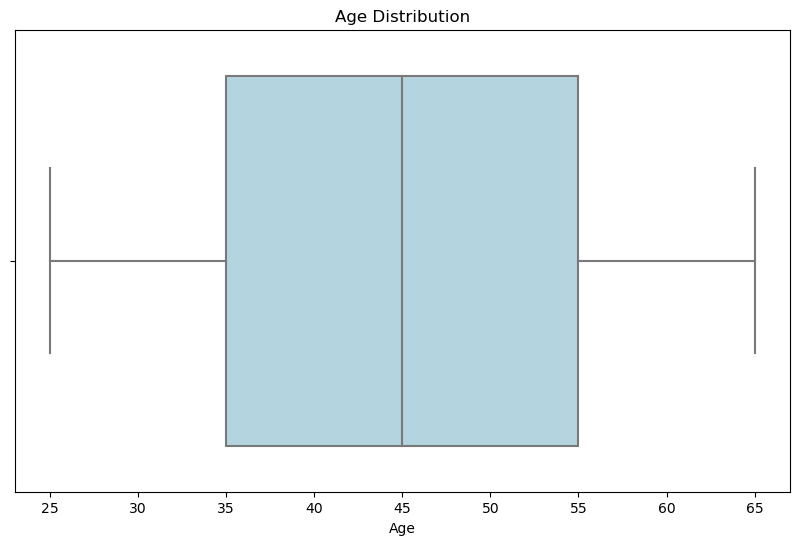

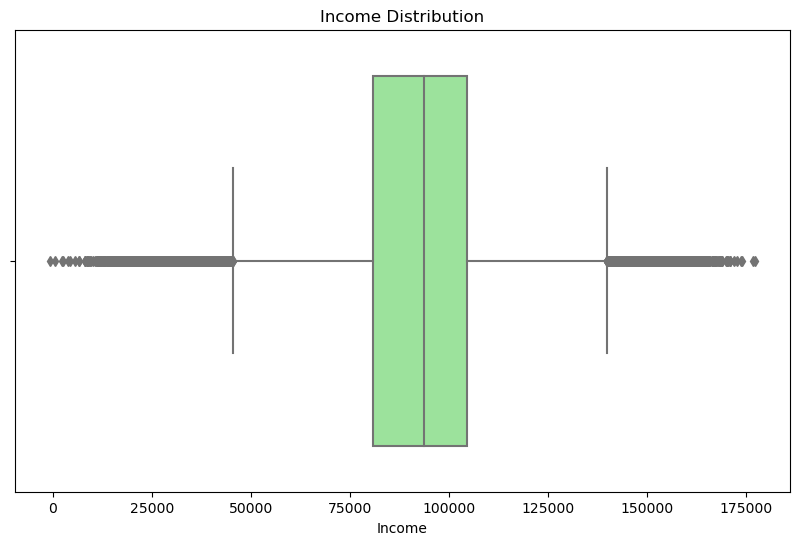

In [3]:
average_age = df['age'].mean()
average_income = df['income'].mean()

print(f"Average Age: {average_age}")
print(f"Average Income: {average_income}")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age', color='lightblue')
plt.title("Age Distribution")
plt.xlabel("Age")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='income', color='lightgreen')
plt.title("Income Distribution")
plt.xlabel("Income")

plt.show()

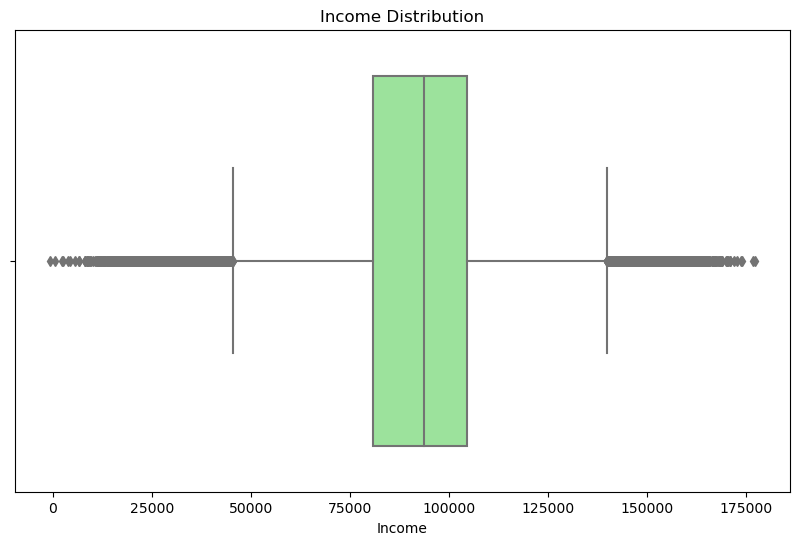

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='income', color='lightgreen')
plt.title("Income Distribution")
plt.xlabel("Income")

plt.show()

Correlation between Age and Income: -0.0013181143630648132


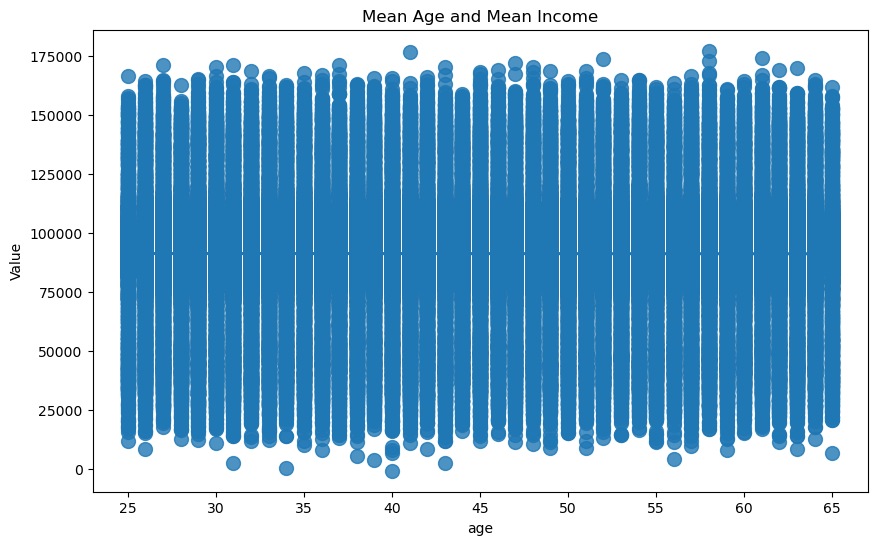

In [11]:
correlation = df['age'].corr(df['income'])
print(f"Correlation between Age and Income: {correlation}")

mean_age = df['age'].mean()
mean_income = df['income'].mean()

plt.figure(figsize=(10, 6))

sns.regplot(data=df, x='age', y='income', ci=None, scatter_kws={'s': 100})
plt.title("Mean Age and Mean Income")
plt.ylabel("Value")
plt.show()

Variance of Gender: 0.0
Standard Deviation of Gender: 0.0
Variance of City: 236242916.2857143
Standard Deviation of City: 15370.195713969108


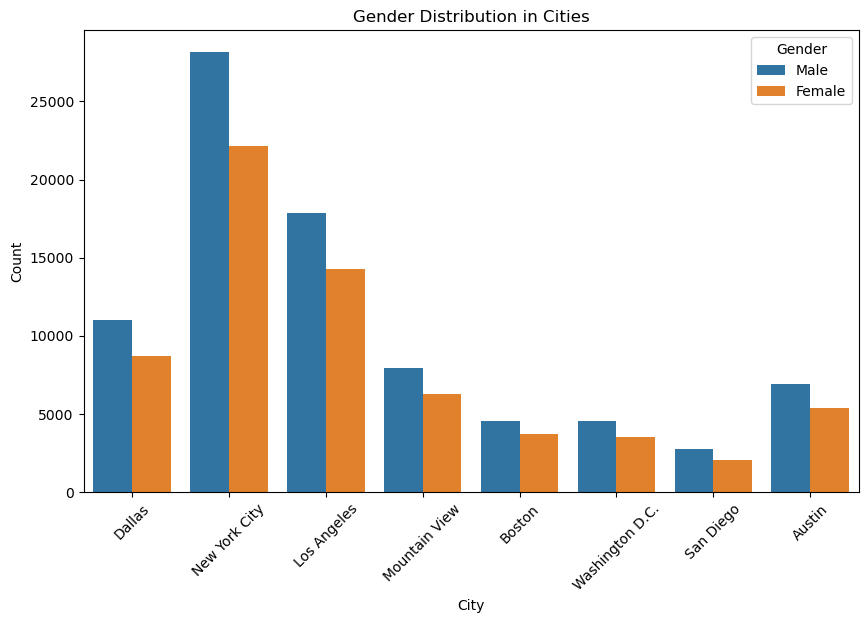

In [6]:
gender_variance = df[df['gender']=="Male"].count().var()
gender_std_dev = df[df['gender']=="Male"].count().std()
city_variance = df['city'].value_counts().var()
city_std_dev = df['city'].value_counts().std()

print(f'Variance of Gender: {gender_variance}')
print(f'Standard Deviation of Gender: {gender_std_dev}')
print(f'Variance of City: {city_variance}')
print(f'Standard Deviation of City: {city_std_dev}')

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='city', hue='gender')
plt.title("Gender Distribution in Cities")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

C:\Users\rajpu\AppData\Local\Temp\ipykernel_1508\2300239604.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


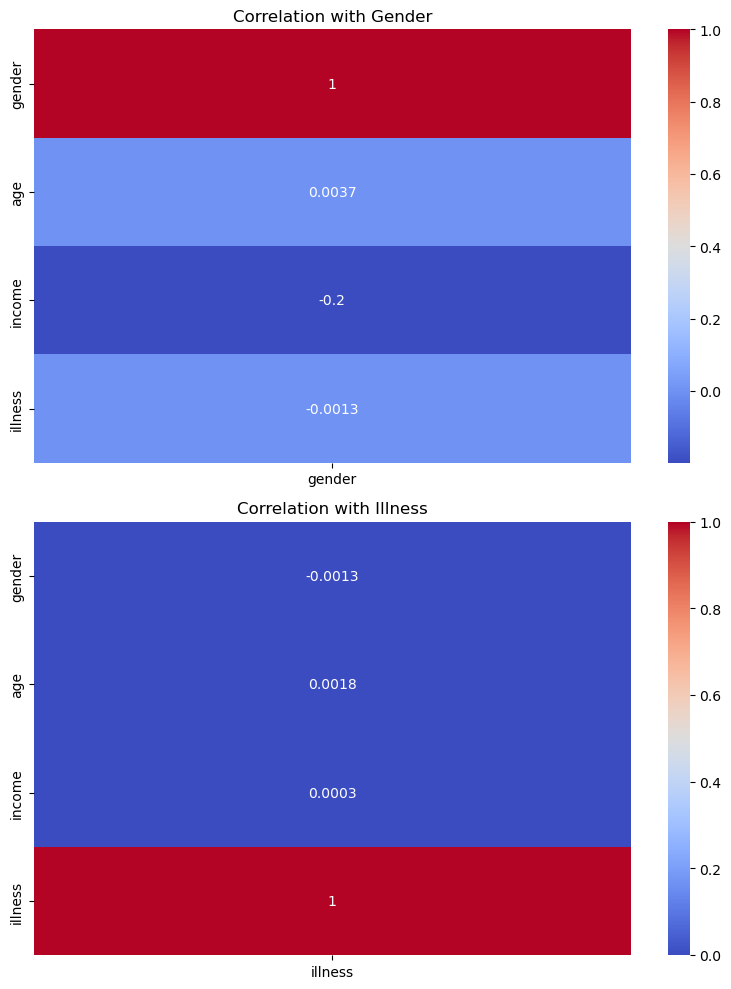

In [7]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['illness'] = df['illness'].map({'No': 0, 'Yes': 1})

correlation_matrix = df.corr()

fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.heatmap(correlation_matrix[['gender']], annot=True, cmap="coolwarm", ax=axes[0])
axes[0].set_title("Correlation with Gender")

sns.heatmap(correlation_matrix[['illness']], annot=True, cmap="coolwarm", ax=axes[1])
axes[1].set_title("Correlation with Illness")

plt.tight_layout()
plt.show()

Numeric Column Statistics:
{'Mean': age          44.950200
income    91252.798273
dtype: float64, 'Median': age          45.0
income    93655.0
dtype: float64, 'Mode': age          26.0
income    98410.0
Name: 0, dtype: float64, 'Variance': age       1.339224e+02
income    6.244752e+08
dtype: float64, 'Standard Deviation': age          11.572486
income    24989.500948
dtype: float64}

Non-Numeric Column Value Counts:
City Value Counts
New York City      50307
Los Angeles        32173
Dallas             19707
Mountain View      14219
Austin             12292
Boston              8301
Washington D.C.     8120
San Diego           4881
Name: city, dtype: int64

Gender Value Counts
0    83800
1    66200
Name: gender, dtype: int64

Illness Value Counts
0    137861
1     12139
Name: illness, dtype: int64



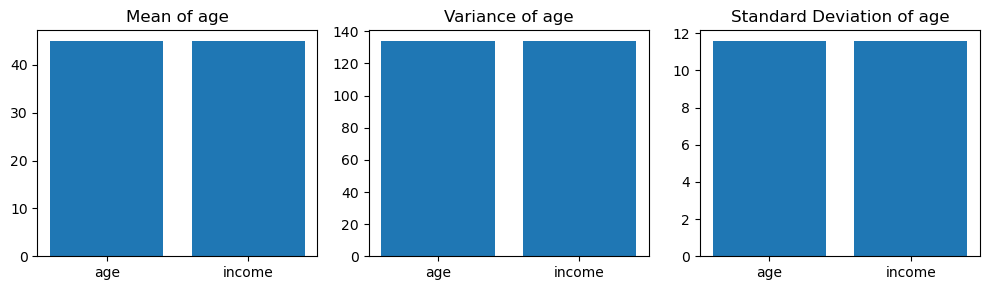

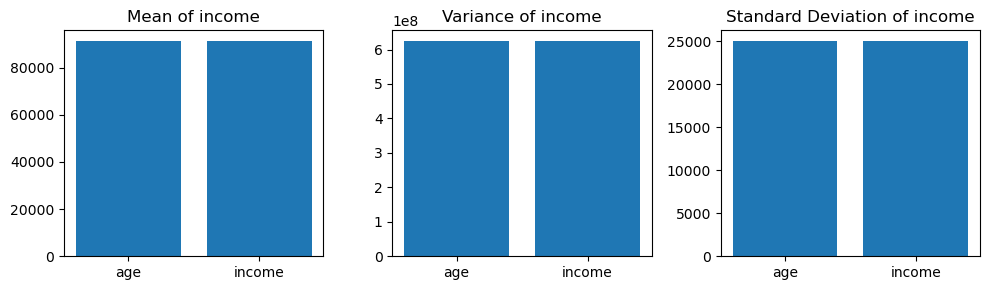

In [8]:
statistics_numeric = {
    'Mean': df[['age', 'income']].mean(),
    'Median': df[['age', 'income']].median(),
    'Mode': df[['age', 'income']].mode().iloc[0],
    'Variance': df[['age', 'income']].var(),
    'Standard Deviation': df[['age', 'income']].std()
}

statistics_non_numeric = {
    'City Value Counts': df['city'].value_counts(),
    'Gender Value Counts': df['gender'].value_counts(),
    'Illness Value Counts': df['illness'].value_counts()
}

print("Numeric Column Statistics:")
print(statistics_numeric)

print("\nNon-Numeric Column Value Counts:")
for column, value_counts in statistics_non_numeric.items():
    print(column)
    print(value_counts)
    print()

numeric_columns = ['age', 'income']

for column in numeric_columns:
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 3, 1)
    plt.bar(statistics_numeric['Mean'].index, statistics_numeric['Mean'][column])
    plt.title(f'Mean of {column}')
    plt.subplot(1, 3, 2)
    plt.bar(statistics_numeric['Variance'].index, statistics_numeric['Variance'][column])
    plt.title(f'Variance of {column}')
    plt.subplot(1, 3, 3)
    plt.bar(statistics_numeric['Standard Deviation'].index, statistics_numeric['Standard Deviation'][column])
    plt.title(f'Standard Deviation of {column}')

    plt.tight_layout()
    plt.show()


In [9]:
data=df['City'].unique()
Mean= df['City'].unique().value_counts().mean(),
Variance= df['City'].unique().value_counts().var(),
Standard_Deviation= df['City'].unique().value_counts().std()
plot=[data, Mean, Variance,Standard_Deviation]
a=sns.lineplot(plot)
a

KeyError: 'City'